In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet18_3d_seg.csv")
df

,train_loss,val_loss,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,fbeta_0.50,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,epoch
0,0.365563,0.469432,0.526857,0.535496,0.534996,0.532383,0.528855,0.525425,0.518567,0.505916,0.491144,0.473868,0.452812,0.427192,0.394051,0.349956,0.286128,0.178879,1
1,0.384432,0.477173,0.343057,0.377635,0.395343,0.408280,0.418327,0.426046,0.432948,0.440163,0.446719,0.452422,0.457706,0.463219,0.466550,0.465720,0.459919,0.410608,2
2,0.364151,0.495879,0.468449,0.467942,0.465876,0.463241,0.460253,0.455634,0.450470,0.444014,0.436392,0.425961,0.411361,0.390459,0.363796,0.327121,0.265669,0.133749,3
3,0.389213,0.455843,0.441795,0.459036,0.468647,0.475088,0.480113,0.484185,0.487415,0.490148,0.491852,0.492819,0.492701,0.491765,0.490075,0.483618,0.457147,0.359557,4
4,0.376886,0.508095,0.478231,0.494771,0.495725,0.493918,0.491830,0.489665,0.487163,0.484496,0.481195,0.476370,0.469426,0.459688,0.444812,0.420009,0.377128,0.286313,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.323470,0.485467,0.430828,0.448657,0.461537,0.470904,0.478378,0.483936,0.488719,0.492608,0.495295,0.497404,0.499285,0.499878,0.493804,0.457449,0.333640,0.092604,152
152,0.339805,0.512603,0.398858,0.408415,0.415165,0.420532,0.424692,0.428159,0.431578,0.434691,0.436927,0.439084,0.442299,0.446043,0.446311,0.427538,0.361280,0.118122,153
153,0.335939,0.490918,0.512667,0.519702,0.523247,0.525647,0.527909,0.529566,0.530485,0.530912,0.530733,0.530111,0.528510,0.524787,0.517027,0.491398,0.409852,0.207569,154
154,0.329467,0.459294,0.521119,0.529643,0.535439,0.539610,0.543033,0.545854,0.548186,0.550476,0.552743,0.555055,0.557582,0.559424,0.558745,0.547859,0.480756,0.304950,155


(0.3, 0.65)

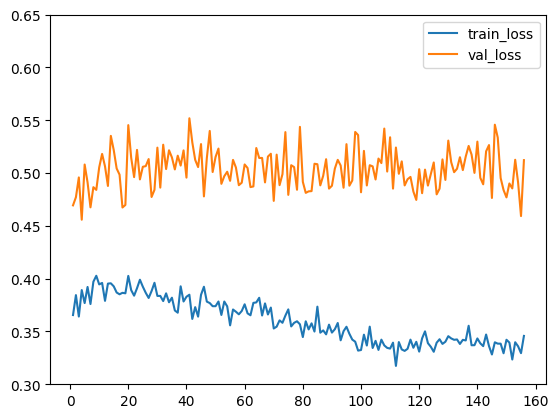

In [34]:
plt.plot(df["epoch"], df["train_loss"], label="train_loss")
plt.plot(df["epoch"], df["val_loss"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["val_loss"].rolling(20).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.65)

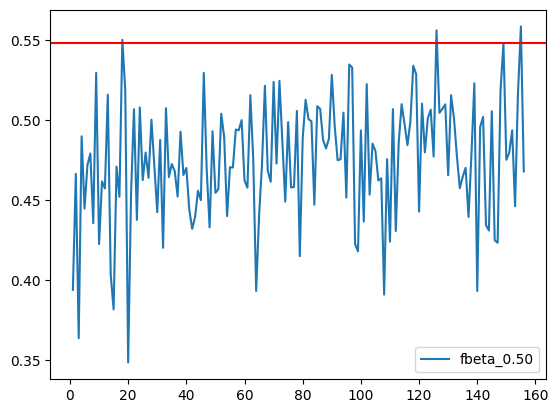

In [35]:
plt.plot(df["epoch"], df["fbeta_0.80"], label="fbeta_0.50")
# plt.plot(df["epoch"], df["fbeta_0.95"].rolling(20).mean(), label="fbeta_0.50")


# set horizontal line at 0.5486
plt.axhline(y=0.5486, color='r', linestyle='-')

plt.legend()
# plt.ylim(0.4, 1)


(156, 16)


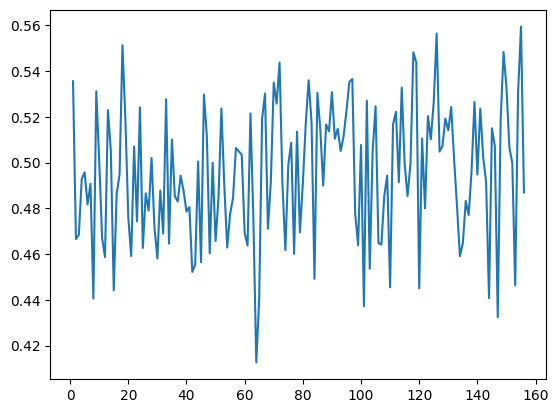

In [36]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

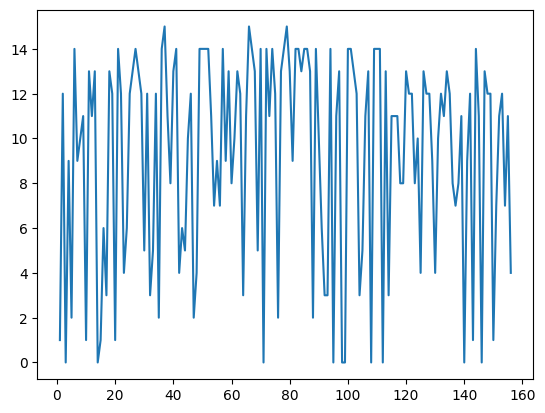

In [37]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

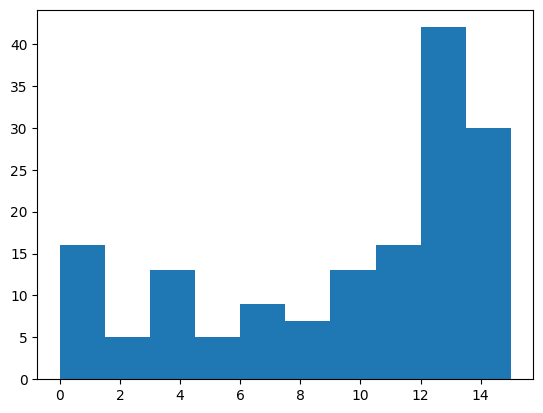

In [38]:
plt.hist(df_fbeta, bins=10);